# Titanic Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_csv('titanic_dataset.csv')

In [3]:
# checking the first five row
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
data.duplicated().sum()

np.int64(0)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
# removing the null value
data = data.dropna(subset=['Cabin'])


In [9]:
# again checking the null value in the dataset
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            4
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [10]:
# Fillin the missing the value of dataset
data['Age'] = data['Age'].fillna("unknown")

In [11]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [12]:
# finding the categorical value automatically in the dataset
categorical_features = data.select_dtypes(include=['object']).columns
print("Categorical Features:", categorical_features)


Categorical Features: Index(['Name', 'Sex', 'Age', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [13]:
# Finding the numerical Feature in the dataset
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Features:", numerical_features.tolist())  # Convert to list for better readability


Numerical Features: ['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch', 'Fare']


In [15]:
nltk.download('punkt', download_dir='/usr/local/nltk_data')


[nltk_data] Downloading package punkt to /usr/local/nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [17]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

# Tokenizing the "Name" column
data["Name_Tokens"] = data["Name"].apply(lambda x: word_tokenize(x))
print(data[["Name", "Name_Tokens"]].head())


                                                 Name  \
12      Snyder, Mrs. John Pillsbury (Nelle Stevenson)   
14  Chaffee, Mrs. Herbert Fuller (Carrie Constance...   
24    Ryerson, Mrs. Arthur Larned (Emily Maria Borie)   
26                       Ostby, Miss. Helene Ragnhild   
28                            Brady, Mr. John Bertram   

                                          Name_Tokens  
12  [Snyder, ,, Mrs., John, Pillsbury, (, Nelle, S...  
14  [Chaffee, ,, Mrs., Herbert, Fuller, (, Carrie,...  
24  [Ryerson, ,, Mrs., Arthur, Larned, (, Emily, M...  
26              [Ostby, ,, Miss, ., Helene, Ragnhild]  
28                     [Brady, ,, Mr., John, Bertram]  


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [18]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...


True

In [19]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk

lemmatizer = WordNetLemmatizer()

# Apply lemmatization to "Name" column
data["Name_Lemma"] = data["Name"].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))
print(data[["Name", "Name_Lemma"]].head())


                                                 Name  \
12      Snyder, Mrs. John Pillsbury (Nelle Stevenson)   
14  Chaffee, Mrs. Herbert Fuller (Carrie Constance...   
24    Ryerson, Mrs. Arthur Larned (Emily Maria Borie)   
26                       Ostby, Miss. Helene Ragnhild   
28                            Brady, Mr. John Bertram   

                                           Name_Lemma  
12   Snyder , Mrs. John Pillsbury ( Nelle Stevenson )  
14  Chaffee , Mrs. Herbert Fuller ( Carrie Constan...  
24  Ryerson , Mrs. Arthur Larned ( Emily Maria Bor...  
26                     Ostby , Miss . Helene Ragnhild  
28                           Brady , Mr. John Bertram  


In [21]:
# Frequency encoding for "Cabin" feature
cabin_freq = data["Cabin"].value_counts().to_dict()
data["Cabin_Freq"] = data["Cabin"].map(cabin_freq)

print(data[["Cabin", "Cabin_Freq"]].head())


              Cabin  Cabin_Freq
12              B45           2
14              E31           1
24  B57 B59 B63 B66           3
26              B36           1
28              A21           1


In [22]:
# Encode "Ticket" based on survival rates
ticket_encoding = data.groupby("Ticket")["Survived"].mean()
data["Ticket_Encoded"] = data["Ticket"].map(ticket_encoding)

print(data[["Ticket", "Ticket_Encoded"]].head())


         Ticket  Ticket_Encoded
12        21228             0.5
14  W.E.P. 5734             1.0
24     PC 17608             0.5
26       113509             1.0
28       113054             0.0


In [23]:
# Mapping 'Sex' column manually
data["Sex"] = data["Sex"].map({"male": 1, "female": 0})

# Mapping 'Embarked' column manually
data["Embarked"] = data["Embarked"].map({"C": 0, "Q": 1, "S": 2})

print(data[["Sex", "Embarked"]].head())


    Sex  Embarked
12    0         2
14    0         2
24    0         0
26    0         0
28    1         2


In [24]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Example: Encoding "Sex" (Male = 1, Female = 0)
data["Sex"] = label_encoder.fit_transform(data["Sex"])

print(data[["Sex"]].head())


    Sex
12    0
14    0
24    0
26    0
28    1


# Visualizing the dataset

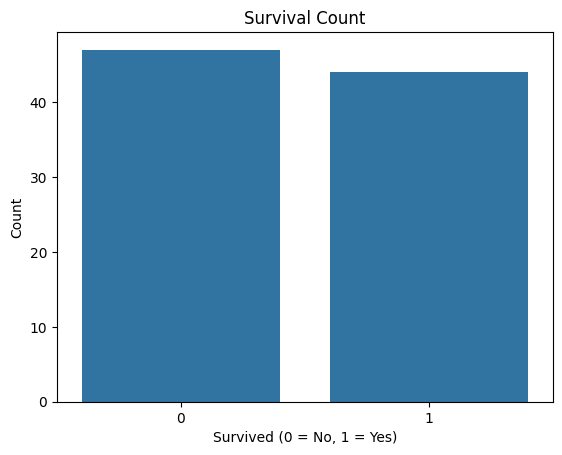

In [27]:
# Bar plot for survival rates
sns.countplot(x='Survived', data=data)
plt.title('Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


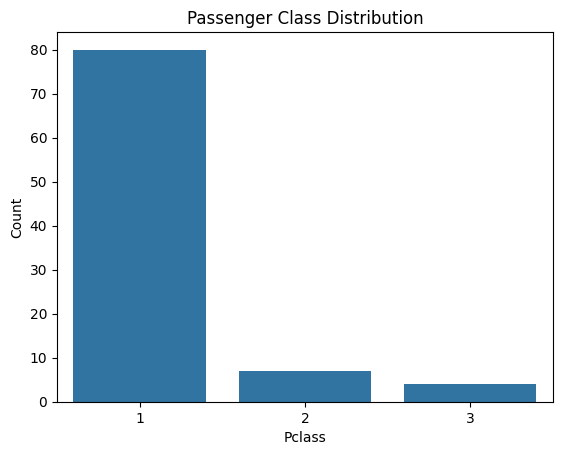

In [31]:
# Count plot for Passenger Class
sns.countplot(x='Pclass', data=data)
plt.title('Passenger Class Distribution')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()


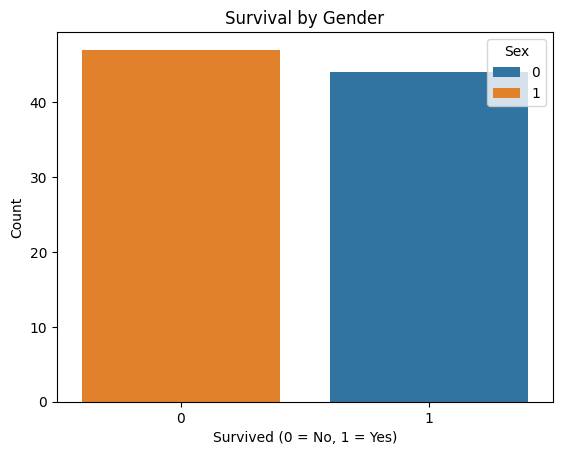

In [32]:
# Count plot for survival by gender
sns.countplot(x='Survived', hue='Sex', data=data)
plt.title('Survival by Gender')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


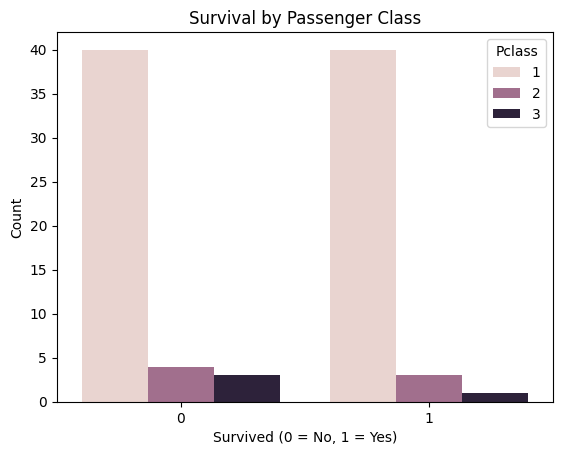

In [33]:
# Count plot for survival by Passenger Class
sns.countplot(x='Survived', hue='Pclass', data=data)
plt.title('Survival by Passenger Class')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


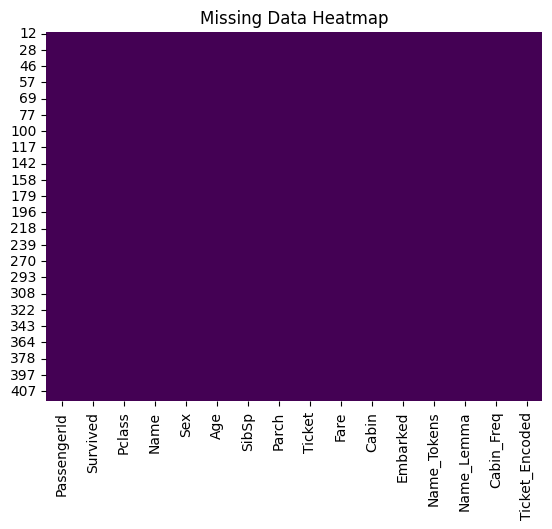

In [35]:
# Heatmap for missing values
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=10)  # Use a limited number of features for simplicity

# Apply vectorization on the Name column
name_vectorized = vectorizer.fit_transform(data['Name'])

# Convert the result to a DataFrame
name_df = pd.DataFrame(name_vectorized.toarray(), columns=vectorizer.get_feature_names_out())

# Concatenate the new features with the original dataset
data = pd.concat([data, name_df], axis=1)

# Display the updated dataset
print(data.head())


    PassengerId  Survived  Pclass  \
12        904.0       1.0     1.0   
14        906.0       1.0     1.0   
24        916.0       1.0     1.0   
26        918.0       1.0     1.0   
28        920.0       0.0     1.0   

                                                 Name  Sex   Age  SibSp  \
12      Snyder, Mrs. John Pillsbury (Nelle Stevenson)  0.0  23.0    1.0   
14  Chaffee, Mrs. Herbert Fuller (Carrie Constance...  0.0  47.0    1.0   
24    Ryerson, Mrs. Arthur Larned (Emily Maria Borie)  0.0  48.0    1.0   
26                       Ostby, Miss. Helene Ragnhild  0.0  22.0    0.0   
28                            Brady, Mr. John Bertram  1.0  41.0    0.0   

    Parch       Ticket      Fare  ...   charles  edward george     henry  \
12    0.0        21228   82.2667  ...  0.000000     0.0    0.0  0.000000   
14    0.0  W.E.P. 5734   61.1750  ...  0.000000     0.0    0.0  0.000000   
24    3.0     PC 17608  262.3750  ...  0.664019     0.0    0.0  0.664019   
26    1.0       113509

In [40]:
# One-hot encoding the Title column
data = pd.get_dummies(data, columns=['Name'], drop_first=True)

# Display the updated dataset
print(data.head())


    PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch       Ticket  \
12        904.0       1.0     1.0  0.0  23.0    1.0    0.0        21228   
14        906.0       1.0     1.0  0.0  47.0    1.0    0.0  W.E.P. 5734   
24        916.0       1.0     1.0  0.0  48.0    1.0    3.0     PC 17608   
26        918.0       1.0     1.0  0.0  22.0    0.0    1.0       113509   
28        920.0       0.0     1.0  1.0  41.0    0.0    0.0       113054   

        Fare            Cabin  ...  \
12   82.2667              B45  ...   
14   61.1750              E31  ...   
24  262.3750  B57 B59 B63 B66  ...   
26   61.9792              B36  ...   
28   30.5000              A21  ...   

    Name_Stengel, Mrs. Charles Emil Henry (Annie May Morris)  \
12                                              False          
14                                              False          
24                                              False          
26                                              False          


In [44]:
# Convert all boolean columns to integers
data = data.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)

# Display the updated dataset
print(data.head())


    PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch       Ticket  \
12        904.0       1.0     1.0  0.0  23.0    1.0    0.0        21228   
14        906.0       1.0     1.0  0.0  47.0    1.0    0.0  W.E.P. 5734   
24        916.0       1.0     1.0  0.0  48.0    1.0    3.0     PC 17608   
26        918.0       1.0     1.0  0.0  22.0    0.0    1.0       113509   
28        920.0       0.0     1.0  1.0  41.0    0.0    0.0       113054   

        Fare            Cabin  ...  \
12   82.2667              B45  ...   
14   61.1750              E31  ...   
24  262.3750  B57 B59 B63 B66  ...   
26   61.9792              B36  ...   
28   30.5000              A21  ...   

    Name_Stengel, Mrs. Charles Emil Henry (Annie May Morris)  \
12                                                  0          
14                                                  0          
24                                                  0          
26                                                  0          


In [46]:
# Identify columns with non-numeric data types
non_numeric_columns = data.select_dtypes(exclude=['number']).columns
print(non_numeric_columns)


Index(['Age', 'Ticket', 'Cabin', 'Name_Tokens', 'Name_Lemma'], dtype='object')


In [49]:
print(data)

    PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch       Ticket  \
12        904.0       1.0     1.0  0.0  23.0    1.0    0.0        21228   
14        906.0       1.0     1.0  0.0  47.0    1.0    0.0  W.E.P. 5734   
24        916.0       1.0     1.0  0.0  48.0    1.0    3.0     PC 17608   
26        918.0       1.0     1.0  0.0  22.0    0.0    1.0       113509   
28        920.0       0.0     1.0  1.0  41.0    0.0    0.0       113054   
..          ...       ...     ...  ...   ...    ...    ...          ...   
86          NaN       NaN     NaN  NaN   NaN    NaN    NaN          NaN   
87          NaN       NaN     NaN  NaN   NaN    NaN    NaN          NaN   
88          NaN       NaN     NaN  NaN   NaN    NaN    NaN          NaN   
89          NaN       NaN     NaN  NaN   NaN    NaN    NaN          NaN   
90          NaN       NaN     NaN  NaN   NaN    NaN    NaN          NaN   

        Fare            Cabin  ...  \
12   82.2667              B45  ...   
14   61.1750           

In [50]:
data.isna().sum()

PassengerId                                          69
Survived                                             69
Pclass                                               69
Sex                                                  69
Age                                                  73
                                                     ..
Name_Warren, Mr. Frank Manley                         0
Name_White, Mrs. John Stuart (Ella Holmes)            0
Name_Widener, Mr. George Dunton                       0
Name_Widener, Mrs. George Dunton (Eleanor Elkins)     0
Name_Wilson, Miss. Helen Alice                        0
Length: 115, dtype: int64

In [52]:
data = data.dropna(subset=['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age'])

In [53]:
data.isna().sum()

PassengerId                                          0
Survived                                             0
Pclass                                               0
Sex                                                  0
Age                                                  0
                                                    ..
Name_Warren, Mr. Frank Manley                        0
Name_White, Mrs. John Stuart (Ella Holmes)           0
Name_Widener, Mr. George Dunton                      0
Name_Widener, Mrs. George Dunton (Eleanor Elkins)    0
Name_Wilson, Miss. Helen Alice                       0
Length: 115, dtype: int64

In [59]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,"Name_Stengel, Mrs. Charles Emil Henry (Annie May Morris)","Name_Straus, Mr. Isidor","Name_Straus, Mrs. Isidor (Rosalie Ida Blun)","Name_Swane, Mr. George","Name_Tucker, Mr. Gilbert Milligan Jr","Name_Warren, Mr. Frank Manley","Name_White, Mrs. John Stuart (Ella Holmes)","Name_Widener, Mr. George Dunton","Name_Widener, Mrs. George Dunton (Eleanor Elkins)","Name_Wilson, Miss. Helen Alice"
12,904.0,1.0,1.0,0.0,23.0,1.0,0.0,21228,82.2667,B45,...,0,0,0,0,0,0,0,0,0,0
14,906.0,1.0,1.0,0.0,47.0,1.0,0.0,W.E.P. 5734,61.1750,E31,...,0,0,0,0,0,0,0,0,0,0
24,916.0,1.0,1.0,0.0,48.0,1.0,3.0,PC 17608,262.3750,B57 B59 B63 B66,...,0,0,0,0,0,0,0,0,0,0
26,918.0,1.0,1.0,0.0,22.0,0.0,1.0,113509,61.9792,B36,...,0,0,0,0,0,0,0,0,0,0
28,920.0,0.0,1.0,1.0,41.0,0.0,0.0,113054,30.5000,A21,...,0,0,0,0,0,0,0,0,0,0


In [60]:
data.corr

<bound method DataFrame.corr of      PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch         Ticket  \
12         904.0       1.0     1.0  0.0  23.0    1.0    0.0          21228   
14         906.0       1.0     1.0  0.0  47.0    1.0    0.0    W.E.P. 5734   
24         916.0       1.0     1.0  0.0  48.0    1.0    3.0       PC 17608   
26         918.0       1.0     1.0  0.0  22.0    0.0    1.0         113509   
28         920.0       0.0     1.0  1.0  41.0    0.0    0.0         113054   
..           ...       ...     ...  ...   ...    ...    ...            ...   
404       1296.0       0.0     1.0  1.0  43.0    1.0    0.0          17765   
405       1297.0       0.0     2.0  1.0  20.0    0.0    0.0  SC/PARIS 2166   
407       1299.0       0.0     1.0  1.0  50.0    1.0    1.0         113503   
411       1303.0       1.0     1.0  0.0  37.0    1.0    0.0          19928   
414       1306.0       1.0     1.0  0.0  39.0    0.0    0.0       PC 17758   

         Fare            Cabin 

In [62]:
import numpy as np

# Function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detect outliers in 'Fare'
outliers_fare = detect_outliers_iqr(data, 'Fare')
print(outliers_fare)


     PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch    Ticket  \
343       1235.0       1.0     1.0  0.0  58.0    0.0    1.0  PC 17755   

         Fare        Cabin  ...  \
343  512.3292  B51 B53 B55  ...   

     Name_Stengel, Mrs. Charles Emil Henry (Annie May Morris)  \
343                                                  0          

    Name_Straus, Mr. Isidor Name_Straus, Mrs. Isidor (Rosalie Ida Blun)  \
343                       0                                           0   

     Name_Swane, Mr. George  Name_Tucker, Mr. Gilbert Milligan Jr  \
343                       0                                     0   

     Name_Warren, Mr. Frank Manley  \
343                              0   

     Name_White, Mrs. John Stuart (Ella Holmes)  \
343                                           0   

     Name_Widener, Mr. George Dunton  \
343                                0   

     Name_Widener, Mrs. George Dunton (Eleanor Elkins)  \
343                                       

# model Training

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
# Define the input feature and target variable
x = data.drop(columns = ['Survived'])
y = data['Survived']

In [68]:
x_train,y_train,x_test,y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [75]:
from sklearn.preprocessing import LabelEncoder
# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Convert categorical variables to numerical using Label Encoding
label_encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col].astype(str))

# Convert the entire dataset to float
data = data.astype(float)

# Display first few rows
print(data.head())

    PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch  Ticket      Fare  \
12        904.0       1.0     1.0  0.0  23.0    1.0    0.0    32.0   82.2667   
14        906.0       1.0     1.0  0.0  47.0    1.0    0.0    65.0   61.1750   
24        916.0       1.0     1.0  0.0  48.0    1.0    3.0    53.0  262.3750   
26        918.0       1.0     1.0  0.0  22.0    0.0    1.0     9.0   61.9792   
28        920.0       0.0     1.0  1.0  41.0    0.0    0.0     7.0   30.5000   

    Cabin  ...  Name_Stengel, Mrs. Charles Emil Henry (Annie May Morris)  \
12   12.0  ...                                                0.0          
14   58.0  ...                                                0.0          
24   15.0  ...                                                0.0          
26   10.0  ...                                                0.0          
28    2.0  ...                                                0.0          

    Name_Straus, Mr. Isidor  Name_Straus, Mrs. Isidor (Rosalie

C:\Users\asus\AppData\Local\Temp\ipykernel_7936\1949696483.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = label_encoder.fit_transform(data[col].astype(str))
C:\Users\asus\AppData\Local\Temp\ipykernel_7936\1949696483.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = label_encoder.fit_transform(data[col].astype(str))
C:\Users\asus\AppData\Local\Temp\ipykernel_7936\1949696483.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [78]:
data.drop(columns=["Ticket"], inplace=True)
